In [14]:
import pandas as pd

df = pd.read_csv('C:\скил\DST-156\IDE_NEW\Семинар 4. Группировка/olymp.csv')
df.info()
df.describe()
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<Axes: xlabel='Year'>

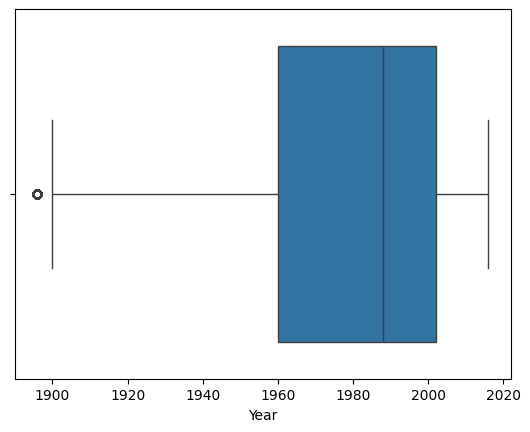

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['Year'])

Вопрос 1

Найдите год проведения Олимпиады, в который средний возраст атлетов был минимальный

АЛГОРИТМ РЕШЕНИЯ

1. Сгруппируйте данные: столбец группировки год/игра (Year/Games), столбец агрегирования возраст (Age), метод агрегирования среднее
2. Отсортируйте данные по возрастанию с помощью .sort_values()

In [16]:
avg_age_by_year = df.groupby('Year')['Age'].mean().sort_values()


print(avg_age_by_year)


Year
1896    23.580645
1980    23.694743
1976    23.841818
1984    23.898347
1988    24.079432
1968    24.248046
1972    24.308607
1992    24.318895
1994    24.422103
1996    24.915045
1964    24.944397
1998    25.163197
1960    25.168848
2000    25.422504
2004    25.639515
2008    25.734118
2002    25.916281
1956    25.926674
2006    25.959151
2012    25.961378
2014    25.987324
2010    26.124262
1952    26.161546
2016    26.207919
1904    26.698150
1908    26.970228
1906    27.125253
1936    27.530328
1912    27.538620
1924    28.373325
1948    28.783947
1900    29.034031
1928    29.112557
1920    29.290978
1932    32.582080
Name: Age, dtype: float64


In [17]:
unique_athletes_per_sport = df.groupby('Sport')['ID'].nunique().sort_values(ascending=False)

unique_athletes_per_sport

Sport
Athletics        22071
Swimming          8765
Rowing            7687
Football          6161
Cycling           5819
                 ...  
Croquet             10
Racquets             7
Roque                4
Basque Pelota        2
Aeronautics          1
Name: ID, Length: 66, dtype: int64

In [18]:
gold_medal_1984 = df[(df['Year'] == 1984) & (df['Season'] == 'Winter') & (df['Medal'] == 'Gold')]

gold_medal_1984.groupby('Team')['ID'].nunique().sort_values(ascending=False)




Team
Soviet Union       27
Norway              6
East Germany        6
Sweden              5
United States       4
East Germany-1      4
East Germany-2      2
Soviet Union-1      2
Italy               2
Finland             2
Great Britain-1     2
West Germany-1      2
Switzerland         2
Canada              1
West Germany        1
Name: ID, dtype: int64

In [19]:
H_and_W = df.groupby(by='NOC')[['Height', "Weight"]].max()
H_and_W['New_feat'] = abs(H_and_W['Height'] - H_and_W['Weight'])
print(H_and_W)
H_and_W['New_feat'].min()

     Height  Weight  New_feat
NOC                          
AFG   186.0   111.0      75.0
AHO   193.0   120.0      73.0
ALB   195.0   130.0      65.0
ALG   200.0   125.0      75.0
AND   189.0    90.0      99.0
..      ...     ...       ...
YEM   185.0    75.0     110.0
YMD   175.0    71.0     104.0
YUG   217.0   130.0      87.0
ZAM   190.0    95.0      95.0
ZIM   205.0   106.0      99.0

[230 rows x 3 columns]


np.float64(21.0)

In [20]:
# Filter and select only athletes from the Soviet Union
soviet_union_athletes = df[df['Team'] == 'Soviet Union']


# Create a pivot table based on the filtered data to count the number of categories of sports disciplines and medals for each athlete
grouped_data = soviet_union_athletes.groupby('ID').agg({'Event': 'nunique', 'Medal': 'count'})

# Calculate the success rate for each athlete
grouped_data['Success_Rate'] = grouped_data['Medal'] / grouped_data['Event']

# Filter by success rate greater than or equal to 0.5
athletes_success_rate_at_least_0_5 = grouped_data[grouped_data['Success_Rate'] >= 0.5]

# Count the number of athletes with a success rate of at least 0.5
num_athletes_success_rate_at_least_0_5 = len(athletes_success_rate_at_least_0_5)

print("Number of athletes from the Soviet Union with a success rate at least 0.5:", num_athletes_success_rate_at_least_0_5)

Number of athletes from the Soviet Union with a success rate at least 0.5: 1545


In [21]:


soviet_union_athletes = df[df['Team'] == 'Soviet Union']

grouped_data = soviet_union_athletes.groupby('ID')[['Event', 'Medal']].count()

grouped_data['Success_Rate'] = grouped_data['Medal'] / grouped_data['Event']

athletes_success_rate_at_least_0_5 = grouped_data[grouped_data['Success_Rate'] >= 0.5]

num_athletes_success_rate_at_least_0_5 = len(athletes_success_rate_at_least_0_5)

print("Number of athletes from the Soviet Union with a success rate at least 0.5:", num_athletes_success_rate_at_least_0_5)

Number of athletes from the Soviet Union with a success rate at least 0.5: 1453


In [22]:
# Create a pivot table to count the number of unique athletes in each year
pivot_table_total = df.groupby('Games')['ID'].nunique()

# Create a pivot table for women to count the number of unique female athletes in each year
pivot_table_women = df[df['Sex'] == 'F'].groupby('Games')['ID'].nunique()

# Calculate the proportion of women in each year
proportion_women = pivot_table_women / pivot_table_total

# Find the Olympics where the proportion of women is greater than the average
average_proportion_women = proportion_women.mean()

olympics_greater_than_average = proportion_women[proportion_women > average_proportion_women]

# Count the number of Olympics where the proportion of women is greater than the average
num_olympics_greater_than_average = olympics_greater_than_average.count()

print("Number of Olympics where the proportion of women is greater than the average:", num_olympics_greater_than_average)

Number of Olympics where the proportion of women is greater than the average: 24


In [23]:
def medal_weight(x):
    if x == "Gold":
        return 3
    elif x == "Silver":
        return 2
    elif x == "Bronze":
        return 1
    else:
        return 0

In [24]:
df["Medal_score"] = df["Medal"].apply(medal_weight)
df["Medal_score"]



0         0
1         0
2         0
3         3
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal_score, Length: 271116, dtype: int64

In [25]:
#числовой дискретный
df["Medal_score"].info()
df["Medal_score"]

<class 'pandas.core.series.Series'>
RangeIndex: 271116 entries, 0 to 271115
Series name: Medal_score
Non-Null Count   Dtype
--------------   -----
271116 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


0         0
1         0
2         0
3         3
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal_score, Length: 271116, dtype: int64

In [26]:
df.groupby(by="Name")["Medal_score"].sum().sort_values(ascending=False)

Name
Michael Fred Phelps, II                    77
Larysa Semenivna Latynina (Diriy-)         41
Nikolay Yefimovich Andrianov               34
Paavo Johannes Nurmi                       33
Ole Einar Bjrndalen                        33
                                           ..
A. Hurtado Vargas                           0
A. Hussain Ahmed                            0
A. J. J. Fridt                              0
A. J. Tyronne Benildus "Benny" Fernando     0
 Eleonora Margarida Josephina Scmitt        0
Name: Medal_score, Length: 134732, dtype: int64